Do differences in centre occupancy and distance travelled influence performance scores?

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import parse_data.prepare_data as prepare_data
import parse_data.identify_filepaths as identify_filepaths
import prepare_questionnaire_data
import globals

In [49]:
dataframe = pd.read_csv('individual_analyses_and_questionnaire_data_table.csv', index_col=0)

In [50]:
dataframe

,experiment_date,pH_H_first_vis_combined_solo_sep1,pH_H_first_vis_combined_solo_sep2,pH_H_first_vis_combined_solo_sep4,pH_H_first_vis_combined_solo_all_seps,pH_H_first_vis_first_solo_all_seps,pH_H_first_vis_second_solo_all_seps,pH_H_first_vis_social_sep1,pH_H_first_vis_social_sep2,pH_H_first_vis_social_sep4,pH_H_first_vis_social_all_seps,pH_L_first_vis_combined_solo_sep1,pH_L_first_vis_combined_solo_sep2,pH_L_first_vis_combined_solo_sep4,pH_L_first_vis_combined_solo_all_seps,pH_L_first_vis_first_solo_all_seps,pH_L_first_vis_second_solo_all_seps,pH_L_first_vis_social_sep1,pH_L_first_vis_social_sep2,pH_L_first_vis_social_sep4,pH_L_first_vis_social_all_seps,sensory_effect_solo_sep1,sensory_effect_social_sep1,solo-social_sensory_effect_sep1,sensory_effect_solo_sep2,sensory_effect_social_sep2,solo-social_sensory_effect_sep2,sensory_effect_solo_sep4,sensory_effect_social_sep4,solo-social_sensory_effect_sep4,sensory_effect_solo_all_seps,sensory_effect_social_all_seps,solo-social_sensory_effect_all_seps,pH_opp_visible_sep_1,pH_opp_visible_sep_2,pH_opp_visible_sep_4,pH_opp_visible_all_seps,pH_opp_not_visible_sep_1,pH_opp_not_visible_sep_2,pH_opp_not_visible_sep_4,pH_opp_not_visible_all_seps,p_win_other_visible_sep_1,p_win_other_visible_sep_2,p_win_other_visible_sep_4,p_win_other_visible,p_win_other_not_visible_sep_1,p_win_other_not_visible_sep_2,p_win_other_not_visible_sep_4,p_win_other_not_visible,solo_centre_occupancy_between_trials,solo_distance_travelled_between_trials,social_centre_occupancy_between_trials,social_distance_travelled_between_trials,rt_by_traj_efficiency_first_solo,rt_by_traj_efficiency_second_solo,rt_by_traj_efficiency_combined_solo,rt_combined_solos,traj_efficiency_combined_solos,rt_by_traj_efficiency_wins,rt_by_traj_efficiency_losses,rt_wins,rt_losses,traj_efficiency_wins,traj_efficiency_losses,proportion_score,proportion_wins,scores_per_unit_time_socials,scores_per_unit_time_solos,AQ_total,GAD_total,BIS_total,opponent
SP17,2024-10-17,NaN,NaN,NaN,0.923076923,NaN,1.000000000,0.700000000,0.700000000,0.857142857,0.740740741,NaN,1.000000000,0.285714286,0.714285714,0.714285714,0.714285714,0.444444444,NaN,0.111111111,0.291666667,NaN,0.255555556,NaN,NaN,NaN,NaN,NaN,0.746031746,NaN,0.208791209,0.449074074,-0.240282865,0.833333333,0.444444444,0.375000000,0.586206897,0.685714286,0.545454545,0.444444444,0.586666667,0.428571429,0.181818182,0.083333333,0.243243243,0.518518519,0.437500000,0.538461538,0.500000000,44.304039115,46.718961524,50.179876342,33.304423309,0.707516060,0.785909117,0.792748367,0.934699194,0.650797540,0.791414960,0.742233606,0.774258661,0.733502952,0.808571259,0.750964260,0.420091324,0.396396396,5.407391081,3.647107819,1.0,1.0,21.0,AW17
VC20,2024-11-20,0.909090909,1.000000000,1.000000000,0.961538462,0.900000000,1.000000000,0.928571429,0.866666667,0.812500000,0.866666667,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,0.937500000,0.375000000,0.235294118,0.536585366,-0.090909091,-0.008928571,-0.081980519,NaN,0.491666667,NaN,NaN,0.577205882,NaN,-0.038461538,0.330081301,-0.368542839,1.000000000,0.750000000,0.555555556,0.825000000,0.941176471,0.696969697,0.515151515,0.752136752,0.789473684,0.666666667,0.444444444,0.675000000,0.606060606,0.714285714,0.640000000,0.645569620,80.491537545,21.126056690,85.568614236,16.837282781,0.884698878,0.872315188,0.929941170,0.919642857,0.940239483,0.920729585,0.838854318,0.860664305,0.688576212,0.980794865,0.989132423,0.703958692,0.669014085,9.932994786,6.675133394,3.0,4.0,19.0,ZS20
IN04,2025-02-04,0.909090909,NaN,1.000000000,0.947368421,0.909090909,1.000000000,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,NaN,NaN,0.769230769,-0.090909091,0.000000000,-0.090909091,NaN,NaN,NaN,0.000000000,NaN,NaN,-0.052631579,0.230769231,-0.283400810,1.000000000,NaN,NaN,0.923076923,1.000000000,0.875000000,0.714285714,0.923076923,0.733333333,0.800000000,0.500000000,0.692307692,0.900000000,1.000000000,0.500000000,0.866666

In [51]:
working_df = dataframe.copy()

In [53]:
strategy_columns = ['social_centre_occupancy_between_trials', 'social_distance_travelled_between_trials', 'rt_by_traj_efficiency_wins', 'rt_by_traj_efficiency_losses','rt_wins','rt_losses','traj_efficiency_wins','traj_efficiency_losses'] 
outcome_columns = ['scores_per_unit_time_socials', 'proportion_score', 'proportion_wins']

correlation_df = working_df[strategy_columns + outcome_columns].corr()
correlation_df.loc[strategy_columns, outcome_columns]


,scores_per_unit_time_socials,proportion_score,proportion_wins
social_centre_occupancy_between_trials,-0.154235723,-0.153494076,-0.172632161
social_distance_travelled_between_trials,0.334974123,0.179854666,0.183136355
rt_by_traj_efficiency_wins,0.172099069,0.309567600,0.296874662
rt_by_traj_efficiency_losses,-0.268207110,-0.187118068,-0.204983022
rt_wins,0.207463615,0.395209042,0.388910912
rt_losses,-0.129505409,-0.128680166,-0.150971771
traj_efficiency_wins,0.057825310,0.076814960,0.061433576
traj_efficiency_losses,-0.287252494,-0.175208407,-0.185358537


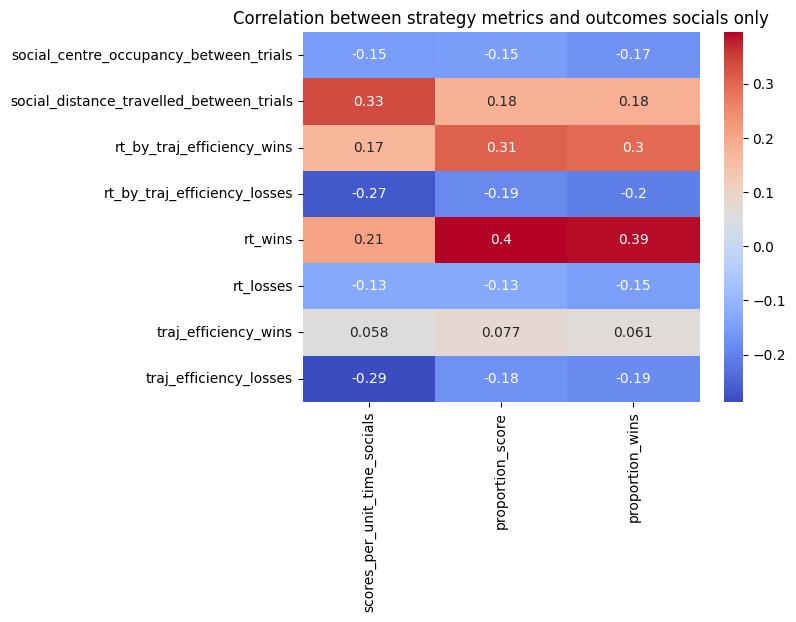

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_df.loc[strategy_columns, outcome_columns], annot=True, cmap='coolwarm')
plt.title("Correlation between strategy metrics and outcomes socials only")
plt.show()

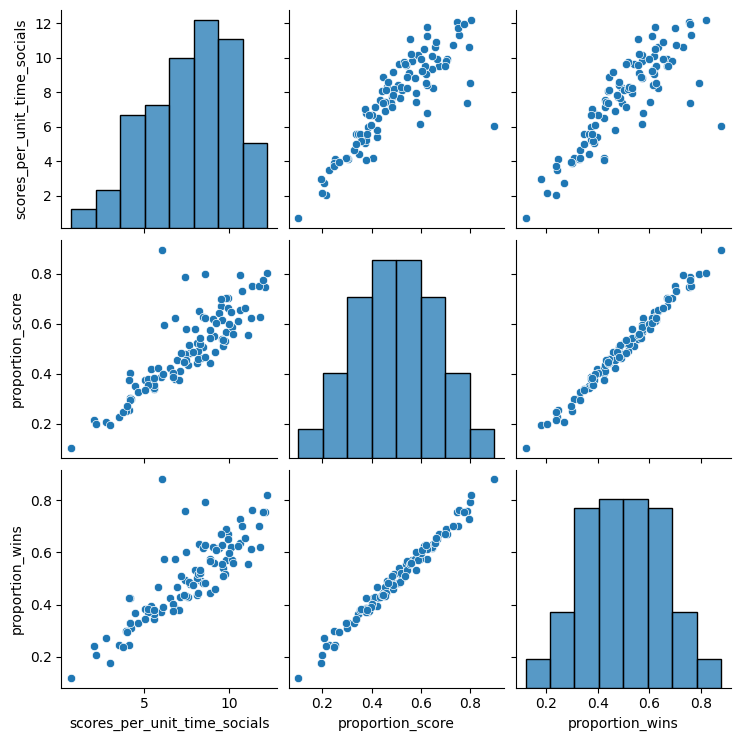

In [55]:
sns.pairplot(working_df, vars=outcome_columns) 
plt.show()


In [56]:
import statsmodels.api as sm

X = working_df[strategy_columns]
X = sm.add_constant(X)  # adds intercept
y = working_df['scores_per_unit_time_socials']
data = pd.concat([X, y], axis=1).dropna()

X_clean = data[strategy_columns]
X_clean = sm.add_constant(X_clean)
y_clean = data['scores_per_unit_time_socials']

model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     scores_per_unit_time_socials   R-squared:                       0.432
Model:                                      OLS   Adj. R-squared:                  0.395
Method:                           Least Squares   F-statistic:                     11.64
Date:                          Sun, 08 Jun 2025   Prob (F-statistic):           1.15e-09
Time:                                  23:12:14   Log-Likelihood:                -205.44
No. Observations:                            99   AIC:                             424.9
Df Residuals:                                92   BIC:                             443.1
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-

In [57]:
X = working_df[strategy_columns]
X = sm.add_constant(X)  # adds intercept
y = working_df['proportion_score']
data = pd.concat([X, y], axis=1).dropna()

X_clean = data[strategy_columns]
X_clean = sm.add_constant(X_clean)
y_clean = data['proportion_score']

model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       proportion_score   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     7.917
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           6.85e-07
Time:                        23:13:04   Log-Likelihood:                 59.983
No. Observations:                  99   AIC:                            -106.0
Df Residuals:                      92   BIC:                            -87.80
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [58]:
X = working_df[strategy_columns]
X = sm.add_constant(X)  # adds intercept
y = working_df['proportion_wins']
data = pd.concat([X, y], axis=1).dropna()

X_clean = data[strategy_columns]
X_clean = sm.add_constant(X_clean)
y_clean = data['proportion_wins']

model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        proportion_wins   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     8.230
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           3.88e-07
Time:                        23:13:19   Log-Likelihood:                 66.848
No. Observations:                  99   AIC:                            -119.7
Df Residuals:                      92   BIC:                            -101.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Visualisation for traj efficiency and RT in loss conditions

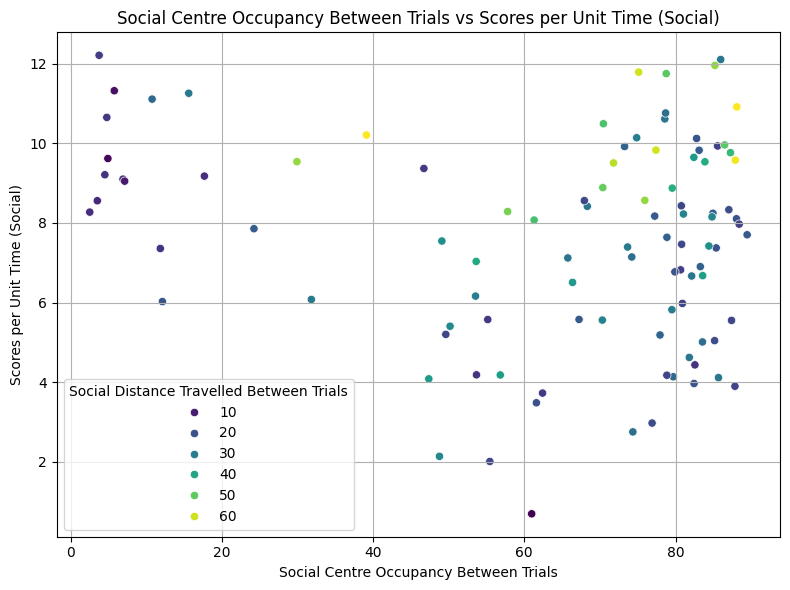

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot: Efficiency during losses vs scores
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=working_df,
    x='social_centre_occupancy_between_trials',
    y='scores_per_unit_time_socials',
    hue='social_distance_travelled_between_trials',  # or cluster
    palette='viridis'
)
plt.title('Social Centre Occupancy Between Trials vs Scores per Unit Time (Social)')
plt.xlabel('Social Centre Occupancy Between Trials')
plt.ylabel('Scores per Unit Time (Social)')
plt.legend(title='Social Distance Travelled Between Trials')
plt.grid(True)
plt.tight_layout()
plt.show()


Adding interaction term for traj efficiency and RT

In [64]:
strategy_columns

['social_centre_occupancy_between_trials',
 'social_distance_travelled_between_trials',
 'rt_by_traj_efficiency_wins',
 'rt_by_traj_efficiency_losses',
 'rt_wins',
 'rt_losses',
 'traj_efficiency_wins',
 'traj_efficiency_losses']

In [72]:
import statsmodels.api as sm

# Create interaction term
working_df['interaction'] = (
    working_df['rt_wins'] * working_df['traj_efficiency_wins']
)

# Prepare predictors and outcome
X = working_df[
    ['social_centre_occupancy_between_trials',
     'social_distance_travelled_between_trials',
     'rt_by_traj_efficiency_wins',
     'rt_by_traj_efficiency_losses',
     'rt_wins',
     'rt_losses',
     'traj_efficiency_wins',
     'traj_efficiency_losses',
     'interaction']
].dropna()

X = sm.add_constant(X)
y = working_df.loc[X.index, 'scores_per_unit_time_socials'] 

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     scores_per_unit_time_socials   R-squared:                       0.432
Model:                                      OLS   Adj. R-squared:                  0.388
Method:                           Least Squares   F-statistic:                     9.883
Date:                          Sun, 08 Jun 2025   Prob (F-statistic):           4.08e-09
Time:                                  23:40:52   Log-Likelihood:                -205.42
No. Observations:                            99   AIC:                             426.8
Df Residuals:                                91   BIC:                             447.6
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-

In [73]:
working_df['solo-social_centre_occupancy'] = working_df['solo_centre_occupancy_between_trials'] - working_df['social_centre_occupancy_between_trials']
working_df['solo-social_distance_travelled'] = working_df['solo_distance_travelled_between_trials'] - working_df['social_distance_travelled_between_trials']

In [74]:
strategy_columns = ['solo-social_centre_occupancy', 'solo-social_distance_travelled'] 
outcome_columns = ['scores_per_unit_time_socials', 'proportion_score', 'proportion_wins']

correlation_df = working_df[strategy_columns + outcome_columns].corr()
correlation_df.loc[strategy_columns, outcome_columns]


,scores_per_unit_time_socials,proportion_score,proportion_wins
solo-social_centre_occupancy,0.238393095,0.281155642,0.288848688
solo-social_distance_travelled,-0.122955322,-0.015847478,-0.033838060


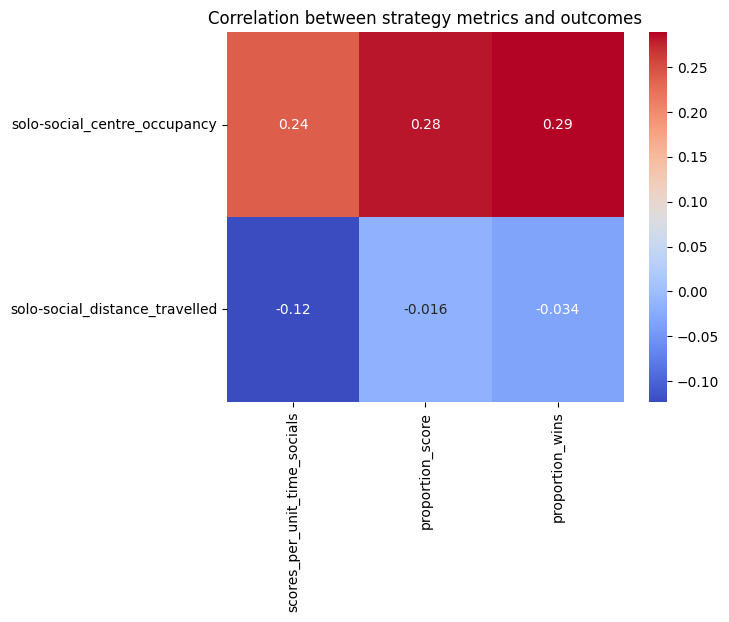

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_df.loc[strategy_columns, outcome_columns], annot=True, cmap='coolwarm')
plt.title("Correlation between strategy metrics and outcomes")
plt.show()

In [76]:
import statsmodels.api as sm

X = working_df[strategy_columns]
X = sm.add_constant(X)  # adds intercept
y = working_df['scores_per_unit_time_socials']
data = pd.concat([X, y], axis=1).dropna()

X_clean = data[strategy_columns]
X_clean = sm.add_constant(X_clean)
y_clean = data['scores_per_unit_time_socials']

model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     scores_per_unit_time_socials   R-squared:                       0.111
Model:                                      OLS   Adj. R-squared:                  0.093
Method:                           Least Squares   F-statistic:                     5.950
Date:                          Sun, 08 Jun 2025   Prob (F-statistic):            0.00368
Time:                                  23:42:57   Log-Likelihood:                -224.84
No. Observations:                            98   AIC:                             455.7
Df Residuals:                                95   BIC:                             463.4
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [77]:
X = working_df[strategy_columns]
X = sm.add_constant(X)  # adds intercept
y = working_df['proportion_score']
data = pd.concat([X, y], axis=1).dropna()

X_clean = data[strategy_columns]
X_clean = sm.add_constant(X_clean)
y_clean = data['proportion_score']

model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       proportion_score   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     5.093
Date:                Sun, 08 Jun 2025   Prob (F-statistic):            0.00792
Time:                        23:43:32   Log-Likelihood:                 44.625
No. Observations:                  98   AIC:                            -83.25
Df Residuals:                      95   BIC:                            -75.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [78]:
X = working_df[strategy_columns]
X = sm.add_constant(X)  # adds intercept
y = working_df['proportion_wins']
data = pd.concat([X, y], axis=1).dropna()

X_clean = data[strategy_columns]
X_clean = sm.add_constant(X_clean)
y_clean = data['proportion_wins']

model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        proportion_wins   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     5.751
Date:                Sun, 08 Jun 2025   Prob (F-statistic):            0.00439
Time:                        23:44:18   Log-Likelihood:                 51.621
No. Observations:                  98   AIC:                            -97.24
Df Residuals:                      95   BIC:                            -89.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [28]:
working_df

,experiment_date,pH_H_first_vis_combined_solo_sep1,pH_H_first_vis_combined_solo_sep2,pH_H_first_vis_combined_solo_sep4,pH_H_first_vis_combined_solo_all_seps,pH_H_first_vis_first_solo_all_seps,pH_H_first_vis_second_solo_all_seps,pH_H_first_vis_social_sep1,pH_H_first_vis_social_sep2,pH_H_first_vis_social_sep4,pH_H_first_vis_social_all_seps,pH_L_first_vis_combined_solo_sep1,pH_L_first_vis_combined_solo_sep2,pH_L_first_vis_combined_solo_sep4,pH_L_first_vis_combined_solo_all_seps,pH_L_first_vis_first_solo_all_seps,pH_L_first_vis_second_solo_all_seps,pH_L_first_vis_social_sep1,pH_L_first_vis_social_sep2,pH_L_first_vis_social_sep4,pH_L_first_vis_social_all_seps,sensory_effect_solo_sep1,sensory_effect_social_sep1,solo-social_sensory_effect_sep1,sensory_effect_solo_sep2,sensory_effect_social_sep2,solo-social_sensory_effect_sep2,sensory_effect_solo_sep4,sensory_effect_social_sep4,solo-social_sensory_effect_sep4,sensory_effect_solo_all_seps,sensory_effect_social_all_seps,solo-social_sensory_effect_all_seps,pH_opp_visible_sep_1,pH_opp_visible_sep_2,pH_opp_visible_sep_4,pH_opp_visible_all_seps,pH_opp_not_visible_sep_1,pH_opp_not_visible_sep_2,pH_opp_not_visible_sep_4,pH_opp_not_visible_all_seps,p_win_other_visible_sep_1,p_win_other_visible_sep_2,p_win_other_visible_sep_4,p_win_other_visible,p_win_other_not_visible_sep_1,p_win_other_not_visible_sep_2,p_win_other_not_visible_sep_4,p_win_other_not_visible,solo_centre_occupancy_between_trials,solo_distance_travelled_between_trials,social_centre_occupancy_between_trials,social_distance_travelled_between_trials,opponent,scores_per_unit_time_solos,scores_per_unit_time_socials,proportion_score,proportion_wins,AQ_total,GAD_total,BIS_total,solo-social_centre_occupancy,solo-social_distance_travelled
SP17,2024-10-17,NaN,NaN,NaN,0.923076923,NaN,1.000000000,0.700000000,0.700000000,0.857142857,0.740740741,NaN,1.000000000,0.285714286,0.714285714,0.714285714,0.714285714,0.444444444,NaN,0.111111111,0.291666667,NaN,0.255555556,NaN,NaN,NaN,NaN,NaN,0.746031746,NaN,0.208791209,0.449074074,-0.240282865,0.833333333,0.444444444,0.375000000,0.586206897,0.685714286,0.545454545,0.444444444,0.586666667,0.428571429,0.181818182,0.083333333,0.243243243,0.518518519,0.437500000,0.538461538,0.500000000,44.304039115,46.718961524,50.179876342,33.304423309,AW17,3.647107819,5.407391081,0.420091324,0.396396396,1.0,1.0,21.0,-5.875837227,13.414538214
VC20,2024-11-20,0.909090909,1.000000000,1.000000000,0.961538462,0.900000000,1.000000000,0.928571429,0.866666667,0.812500000,0.866666667,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,0.937500000,0.375000000,0.235294118,0.536585366,-0.090909091,-0.008928571,-0.081980519,NaN,0.491666667,NaN,NaN,0.577205882,NaN,-0.038461538,0.330081301,-0.368542839,1.000000000,0.750000000,0.555555556,0.825000000,0.941176471,0.696969697,0.515151515,0.752136752,0.789473684,0.666666667,0.444444444,0.675000000,0.606060606,0.714285714,0.640000000,0.645569620,80.491537545,21.126056690,85.568614236,16.837282781,ZS20,6.675133394,9.932994786,0.703958692,0.669014085,3.0,4.0,19.0,-5.077076692,4.288773908
IN04,2025-02-04,0.909090909,NaN,1.000000000,0.947368421,0.909090909,1.000000000,1.000000000,NaN,NaN,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,NaN,NaN,0.769230769,-0.090909091,0.000000000,-0.090909091,NaN,NaN,NaN,0.000000000,NaN,NaN,-0.052631579,0.230769231,-0.283400810,1.000000000,NaN,NaN,0.923076923,1.000000000,0.875000000,0.714285714,0.923076923,0.733333333,0.800000000,0.500000000,0.692307692,0.900000000,1.000000000,0.500000000,0.866666667,85.670566501,27.183846032,85.977845189,28.556667499,JL04,6.206709122,12.103710986,0.746212121,0.754385965,7.0,2.0,17.0,-0.307278688,-1.372821467
JL19,2025-03-19,1.000000000,NaN,1.000000000,1.000000000,1.000000000,NaN,0.916666667,0.714285714,0.200000000,0.620689655,NaN,0.875000000,1.000000000,0.952380952,0.916666667,1.000000000,0.384615385,0.375000000,0.250000000,0.344827586,NaN,0.532051282,NaN,NaN,0.339285714,NaN,0.

Opponent and sensory effects

In [79]:
working_df = working_df.copy()

In [80]:
working_df['invis-vis_opp_pH'] = working_df['pH_opp_not_visible_all_seps'] - working_df['pH_opp_visible_all_seps']

In [81]:
working_df['invis-vis_opp_pW'] = working_df['p_win_other_not_visible'] - working_df['p_win_other_visible']

In [82]:
strategy_columns = ['solo-social_sensory_effect_all_seps','invis-vis_opp_pW','invis-vis_opp_pH']

In [83]:
X = working_df[strategy_columns]
X = sm.add_constant(X)  # adds intercept
y = working_df['proportion_wins']
data = pd.concat([X, y], axis=1).dropna()

X_clean = data[strategy_columns]
X_clean = sm.add_constant(X_clean)
y_clean = data['proportion_wins']

model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        proportion_wins   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.832
Date:                Sun, 08 Jun 2025   Prob (F-statistic):              0.147
Time:                        23:45:41   Log-Likelihood:                 49.001
No. Observations:                  98   AIC:                            -90.00
Df Residuals:                      94   BIC:                            -79.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [84]:
X = working_df[strategy_columns]
X = sm.add_constant(X)  # adds intercept
y = working_df['proportion_score']
data = pd.concat([X, y], axis=1).dropna()

X_clean = data[strategy_columns]
X_clean = sm.add_constant(X_clean)
y_clean = data['proportion_score']

model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       proportion_score   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.023
Date:                Sun, 08 Jun 2025   Prob (F-statistic):              0.116
Time:                        23:45:45   Log-Likelihood:                 42.914
No. Observations:                  98   AIC:                            -77.83
Df Residuals:                      94   BIC:                            -67.49
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [85]:
X = working_df[strategy_columns]
X = sm.add_constant(X)  # adds intercept
y = working_df['scores_per_unit_time_socials']
data = pd.concat([X, y], axis=1).dropna()

X_clean = data[strategy_columns]
X_clean = sm.add_constant(X_clean)
y_clean = data['scores_per_unit_time_socials']

model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     scores_per_unit_time_socials   R-squared:                       0.040
Model:                                      OLS   Adj. R-squared:                  0.009
Method:                           Least Squares   F-statistic:                     1.309
Date:                          Sun, 08 Jun 2025   Prob (F-statistic):              0.276
Time:                                  23:45:50   Log-Likelihood:                -228.22
No. Observations:                            98   AIC:                             464.4
Df Residuals:                                94   BIC:                             474.8
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------

Opponent strategy effects

Wall separation analyses